# Setup 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import json
import pandas as pd

In [3]:
ROOT_DIR = '../../'
import sys
sys.path.insert(0, ROOT_DIR)

import eval_utils

## Define models to eval 

In [4]:
EVAL_DATASET = 'single-pixel-color'
MODEL_TYPE = 'rsa_ensemble'

In [5]:
eval_results = eval_utils.load_eval_results(EVAL_DATASET, MODEL_TYPE, listener_types=['val'])

# Vocab Distribution 

In [6]:
listener_type = 'val' # pick 'val' since there's only one val listener regardless of speaker type; when there are multiple listeners there are nested dicts in `eval_results`
vocab_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents']) for curr_speaker_results in eval_results]

In [7]:
dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in vocab_dist]

<AxesSubplot:ylabel='Proportion'>

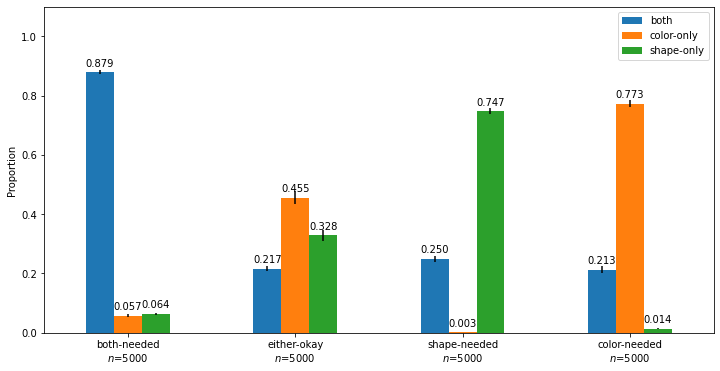

In [8]:
eval_utils.visualize_utterance_distribution(dist_per_speaker)

### When target is red circle

<AxesSubplot:ylabel='Proportion'>

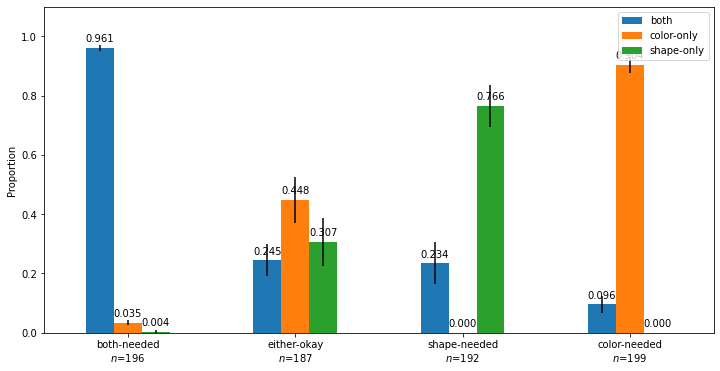

In [9]:
red_circle_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents'], lambda x: x[0] == 'red' and x[1] == 'circle') for curr_speaker_results in eval_results]
red_circle_dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in red_circle_dist]
eval_utils.visualize_utterance_distribution(red_circle_dist_per_speaker)

### Target is non-red circle 

<AxesSubplot:ylabel='Proportion'>

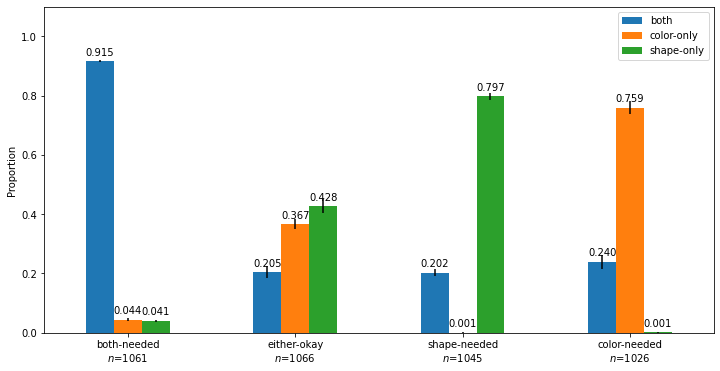

In [10]:
nonred_circle_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents'], lambda x: x[0] != 'red' and x[1] == 'circle') for curr_speaker_results in eval_results]
nonred_circle_dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in nonred_circle_dist]
eval_utils.visualize_utterance_distribution(nonred_circle_dist_per_speaker)

### Target is red non-circle 

<AxesSubplot:ylabel='Proportion'>

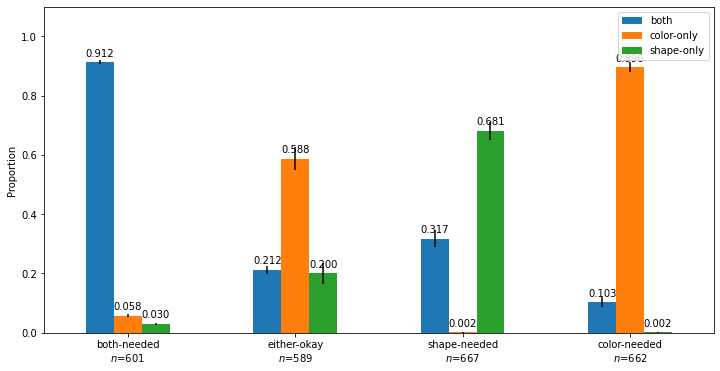

In [11]:
red_noncircle_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents'], lambda x: x[0] == 'red' and x[1] != 'circle') for curr_speaker_results in eval_results]
red_noncircle_dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in red_noncircle_dist]
eval_utils.visualize_utterance_distribution(red_noncircle_dist_per_speaker)

### Target is neither red nor circle

<AxesSubplot:ylabel='Proportion'>

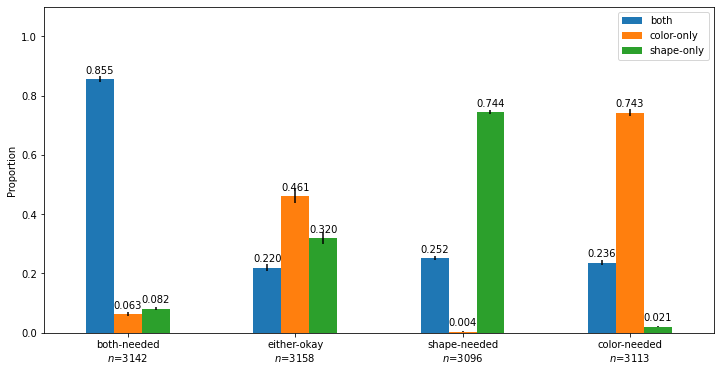

In [12]:
nonred_noncircle_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents'], lambda x: x[0] != 'red' and x[1] != 'circle') for curr_speaker_results in eval_results]
nonred_noncircle_dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in nonred_noncircle_dist]
eval_utils.visualize_utterance_distribution(nonred_noncircle_dist_per_speaker)

# Accuracy

## Val listener

In [13]:
val_accuracy_per_speaker = [eval_utils.analyze_accuracy(curr_speaker_results['val'], curr_speaker_results['all_referents']) for curr_speaker_results in eval_results]

../../eval_utils.py:319: RuntimeWarning: invalid value encountered in true_divide
  incorrect_mean_maxprob_by_config /= num_incorrect_by_config


In [14]:
[val_accuracy['overall_accuracy'] for val_accuracy in val_accuracy_per_speaker]

[0.93515, 0.9375, 0.93665, 0.93935, 0.93645]

In [32]:
val_accuracy_per_speaker_by_condition = {}
for context in val_accuracy_per_speaker[0]['accuracy_by_context']:
    curr_context_acc = np.asarray([val_accuracy['accuracy_by_context'][context] for val_accuracy in val_accuracy_per_speaker])
    val_accuracy_per_speaker_by_condition[context] = curr_context_acc

aggregate_val_accuracy_by_condition = {condition: (np.mean(accs).round(4), np.std(accs).round(4)) for condition, accs in val_accuracy_per_speaker_by_condition.items()}

aggregate_val_accuracy_by_condition # each tuple is (mean, std)

{'both-needed': (0.8858, 0.0031),
 'either-okay': (0.9908, 0.0015),
 'shape-needed': (0.91, 0.0013),
 'color-needed': (0.9614, 0.0017)}

# QA 

In [16]:
from collections import Counter

In [17]:
speaker_idx = 0 # only looking at 1 speaker

shape_qa = eval_utils.qualitative_analysis('shape-needed', eval_results[speaker_idx]['val'], eval_results[speaker_idx]['all_referents'], num_examples=-1)
color_qa = eval_utils.qualitative_analysis('color-needed', eval_results[speaker_idx]['val'], eval_results[speaker_idx]['all_referents'], num_examples=-1)
either_qa = eval_utils.qualitative_analysis('either-okay', eval_results[speaker_idx]['val'], eval_results[speaker_idx]['all_referents'], num_examples=-1)

In [18]:
shape_qa

[{'pred': 0,
  'referents': ['gray circle', 'gray rectangle', 'gray ellipse'],
  'utterance': 'circle',
  'sem': array([1.   , 0.   , 0.103], dtype=float32),
  'probs': array([0.563, 0.207, 0.23 ], dtype=float32)},
 {'pred': 0,
  'referents': ['yellow square', 'yellow rectangle', 'yellow circle'],
  'utterance': 'square',
  'sem': array([0.997, 0.   , 0.   ], dtype=float32),
  'probs': array([0.575, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['blue rectangle', 'blue ellipse', 'blue square'],
  'utterance': 'rectangle',
  'sem': array([0.234, 0.   , 0.168], dtype=float32),
  'probs': array([0.367, 0.29 , 0.343], dtype=float32)},
 {'pred': 0,
  'referents': ['green square', 'green circle', 'green ellipse'],
  'utterance': 'square',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['red square', 'red circle', 'red ellipse'],
  'utterance': 'square',
  'sem': array([1., 0., 0.], dtype=float32)

## in `shape-needed`, what are examples where color is mentioned?

In [19]:
both_filter_func = lambda x: any([s in x['utterance'] for s in eval_utils.SHAPES]) and any([c in x['utterance'] for c in eval_utils.COLORS])

In [20]:
filtered_shape_qa = list(filter(both_filter_func, shape_qa))
filtered_shape_qa[:8]

[{'pred': 0,
  'referents': ['blue square', 'blue rectangle', 'blue ellipse'],
  'utterance': 'blue square',
  'sem': array([0.798, 0.   , 0.   ], dtype=float32),
  'probs': array([0.526, 0.237, 0.237], dtype=float32)},
 {'pred': 0,
  'referents': ['white square', 'white circle', 'white ellipse'],
  'utterance': 'white square',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['red circle', 'red rectangle', 'red ellipse'],
  'utterance': 'red circle',
  'sem': array([1.   , 0.   , 0.213], dtype=float32),
  'probs': array([0.548, 0.202, 0.25 ], dtype=float32)},
 {'pred': 0,
  'referents': ['green ellipse', 'green square', 'green circle'],
  'utterance': 'green ellipse',
  'sem': array([0.988, 0.   , 0.103], dtype=float32),
  'probs': array([0.56 , 0.209, 0.231], dtype=float32)},
 {'pred': 0,
  'referents': ['yellow square', 'yellow rectangle', 'yellow ellipse'],
  'utterance': 'yellow square',
  'sem': arra

In [21]:
Counter(map(lambda x:x['referents'][0], filtered_shape_qa)).most_common()

[('red rectangle', 85),
 ('yellow rectangle', 85),
 ('white square', 80),
 ('blue square', 76),
 ('red square', 72),
 ('white rectangle', 70),
 ('yellow circle', 68),
 ('blue rectangle', 67),
 ('yellow square', 63),
 ('yellow ellipse', 58),
 ('red ellipse', 58),
 ('white ellipse', 52),
 ('white circle', 52),
 ('blue circle', 45),
 ('green ellipse', 44),
 ('blue ellipse', 41),
 ('green rectangle', 40),
 ('green square', 39),
 ('red circle', 36),
 ('gray rectangle', 31),
 ('green circle', 29),
 ('gray circle', 27),
 ('gray square', 26),
 ('gray ellipse', 16)]

## in `color-needed`, what are examples where shape is mentioned 

In [22]:
# in color-needed, what are examples where color is mentioned
filtered_color_qa = list(filter(both_filter_func, color_qa))
filtered_color_qa[:8]

[{'pred': 1,
  'referents': ['white ellipse', 'yellow ellipse', 'blue ellipse'],
  'utterance': 'white ellipse',
  'sem': array([0.012, 0.109, 0.   ], dtype=float32),
  'probs': array([0.324, 0.357, 0.32 ], dtype=float32)},
 {'pred': 0,
  'referents': ['blue ellipse', 'yellow ellipse', 'gray ellipse'],
  'utterance': 'blue ellipse',
  'sem': array([0.999, 0.   , 0.   ], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['green square', 'blue square', 'yellow square'],
  'utterance': 'green square',
  'sem': array([0.404, 0.   , 0.   ], dtype=float32),
  'probs': array([0.428, 0.286, 0.286], dtype=float32)},
 {'pred': 0,
  'referents': ['gray ellipse', 'yellow ellipse', 'red ellipse'],
  'utterance': 'gray ellipse',
  'sem': array([1.  , 0.  , 0.99], dtype=float32),
  'probs': array([0.424, 0.156, 0.42 ], dtype=float32)},
 {'pred': 0,
  'referents': ['green square', 'blue square', 'red square'],
  'utterance': 'green square',
  'sem': a

In [23]:
Counter(map(lambda x:x['referents'][0], filtered_color_qa)).most_common()

[('gray ellipse', 120),
 ('gray rectangle', 115),
 ('gray circle', 113),
 ('gray square', 107),
 ('green ellipse', 98),
 ('green circle', 93),
 ('green square', 56),
 ('green rectangle', 53),
 ('blue ellipse', 38),
 ('red ellipse', 30),
 ('white ellipse', 29),
 ('blue circle', 25),
 ('yellow square', 23),
 ('white square', 23),
 ('white circle', 23),
 ('red square', 20),
 ('blue rectangle', 20),
 ('blue square', 19),
 ('red circle', 19),
 ('white rectangle', 17),
 ('yellow ellipse', 13),
 ('yellow circle', 12),
 ('red rectangle', 10),
 ('yellow rectangle', 8)]

## in `either-okay` 

### mentions color, no shape 

In [24]:
color_only_filter_func = lambda x: any([c in x['utterance'] for c in eval_utils.COLORS]) and all([s not in x['utterance'] for s in eval_utils.SHAPES])

color_only_filtered_qa = list(filter(color_only_filter_func, either_qa))

Counter(map(lambda x:x['referents'][0], color_only_filtered_qa)).most_common()

[('yellow rectangle', 172),
 ('white rectangle', 157),
 ('blue rectangle', 155),
 ('yellow ellipse', 146),
 ('yellow square', 137),
 ('red rectangle', 132),
 ('red ellipse', 132),
 ('white square', 129),
 ('white ellipse', 129),
 ('blue ellipse', 123),
 ('white circle', 117),
 ('yellow circle', 115),
 ('blue square', 114),
 ('blue circle', 101),
 ('red square', 97),
 ('red circle', 85),
 ('green rectangle', 70),
 ('green square', 58),
 ('green ellipse', 37),
 ('gray rectangle', 29),
 ('gray square', 24),
 ('gray ellipse', 18),
 ('green circle', 16),
 ('gray circle', 9)]

In [25]:
color_only_filtered_qa[:8]

[{'pred': 0,
  'referents': ['white circle', 'blue ellipse', 'red square'],
  'utterance': 'white shape',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['white square', 'blue ellipse', 'red rectangle'],
  'utterance': 'white',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['red rectangle', 'gray square', 'gray circle'],
  'utterance': 'red shape',
  'sem': array([0.999, 0.   , 0.   ], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['white ellipse', 'yellow rectangle', 'gray circle'],
  'utterance': 'white shape',
  'sem': array([1.   , 0.004, 0.   ], dtype=float32),
  'probs': array([0.576, 0.213, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['yellow square', 'blue ellipse', 'green rectangle'],
  'utterance': 'yellow shape',
  'sem': array([1., 0., 0.], dtype=

### mentions shape, but no color 

In [26]:
shape_only_filter_func = lambda x: any([s in x['utterance'] for s in eval_utils.SHAPES]) and all([c not in x['utterance'] for c in eval_utils.COLORS])

shape_only_filtered_qa = list(filter(shape_only_filter_func, either_qa))

Counter(map(lambda x:x['referents'][0], shape_only_filtered_qa)).most_common()

[('gray circle', 147),
 ('gray ellipse', 141),
 ('gray square', 137),
 ('green circle', 133),
 ('gray rectangle', 133),
 ('green square', 111),
 ('green ellipse', 99),
 ('green rectangle', 88),
 ('blue circle', 73),
 ('white circle', 69),
 ('red circle', 62),
 ('yellow circle', 56),
 ('white square', 51),
 ('red square', 48),
 ('blue ellipse', 42),
 ('yellow square', 42),
 ('blue square', 38),
 ('white ellipse', 35),
 ('white rectangle', 35),
 ('yellow ellipse', 35),
 ('red ellipse', 34),
 ('red rectangle', 32),
 ('blue rectangle', 20),
 ('yellow rectangle', 17)]

In [27]:
shape_only_filtered_qa[:8]

[{'pred': 0,
  'referents': ['gray ellipse', 'red square', 'blue square'],
  'utterance': 'ellipse',
  'sem': array([0.984, 0.   , 0.   ], dtype=float32),
  'probs': array([0.572, 0.214, 0.214], dtype=float32)},
 {'pred': 0,
  'referents': ['red square', 'yellow circle', 'green ellipse'],
  'utterance': 'square',
  'sem': array([1.   , 0.007, 0.   ], dtype=float32),
  'probs': array([0.575, 0.213, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['yellow circle', 'gray ellipse', 'blue rectangle'],
  'utterance': 'circle',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['red circle', 'blue square', 'yellow ellipse'],
  'utterance': 'circle',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['blue ellipse', 'red rectangle', 'yellow rectangle'],
  'utterance': 'ellipse',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs

## mentions both color and shape 

In [28]:
both_present_filter_func = lambda x: any([s in x['utterance'] for s in eval_utils.SHAPES]) and any([c in x['utterance'] for c in eval_utils.COLORS])

both_present_filtered_qa = list(filter(both_present_filter_func, either_qa))

Counter(map(lambda x:x['referents'][0], shape_only_filtered_qa)).most_common()

[('gray circle', 147),
 ('gray ellipse', 141),
 ('gray square', 137),
 ('green circle', 133),
 ('gray rectangle', 133),
 ('green square', 111),
 ('green ellipse', 99),
 ('green rectangle', 88),
 ('blue circle', 73),
 ('white circle', 69),
 ('red circle', 62),
 ('yellow circle', 56),
 ('white square', 51),
 ('red square', 48),
 ('blue ellipse', 42),
 ('yellow square', 42),
 ('blue square', 38),
 ('white ellipse', 35),
 ('white rectangle', 35),
 ('yellow ellipse', 35),
 ('red ellipse', 34),
 ('red rectangle', 32),
 ('blue rectangle', 20),
 ('yellow rectangle', 17)]

In [29]:
qa = eval_utils.qualitative_analysis('both-needed', eval_results[speaker_idx]['val'], eval_results[speaker_idx]['all_referents'], num_examples=-1)

In [30]:
filter_func = lambda x: 'white' in x['referents'][0] and 'gray' in x['utterance']

In [31]:
list(filter(filter_func, qa))

[{'pred': 2,
  'referents': ['white circle', 'blue circle', 'white ellipse'],
  'utterance': 'gray shape',
  'sem': array([0., 0., 0.], dtype=float32),
  'probs': array([0.333, 0.333, 0.333], dtype=float32)},
 {'pred': 0,
  'referents': ['white square', 'yellow square', 'white rectangle'],
  'utterance': 'gray square',
  'sem': array([0., 0., 0.], dtype=float32),
  'probs': array([0.333, 0.333, 0.333], dtype=float32)},
 {'pred': 2,
  'referents': ['white square', 'yellow square', 'white rectangle'],
  'utterance': 'gray square',
  'sem': array([0., 0., 0.], dtype=float32),
  'probs': array([0.333, 0.333, 0.333], dtype=float32)},
 {'pred': 1,
  'referents': ['white circle', 'yellow circle', 'white ellipse'],
  'utterance': 'gray circle',
  'sem': array([0., 0., 0.], dtype=float32),
  'probs': array([0.333, 0.333, 0.333], dtype=float32)}]